# Business Case: BitCoin Sentiment Analysis

**_Author: Michael Pham_**

### Introduction:
Bitcoin is digital currency that has taken a huge attention from the public by being a quick growing asset. Because of this, Private Investors are interested in what the sentimental values surrounding bitcoin is to make a more informed investment. By using the comments/discussions on the Bitcoin sub-Reddit, I can find out if Bitcoin is positively perceived by the public. 


# Load and Clean DataSet

In [1]:
import re 
import pandas as pd
import nltk 

In [2]:
comments = pd.read_csv('comments.csv')

In [3]:
comments.head(20)

,Reply,Upvote,Time,Key
0,"Brilliant.\r\n\r\nEdit: \r\n\r\nWell, as I’m h...",4543,2018-02-04 15:49:03,1
1,"Awesome, except all the other coins fell in af...",744,2018-02-04 17:17:05,1
2,Best Simpsons ever,858,2018-02-04 16:05:41,1
3,"Simpsons predicted Bitcoin, again",369,2018-02-04 16:42:58,1
4,The things that fall on Homers head are 1) Alt...,971,2018-02-04 17:39:30,1
5,Remember Bitcoin? It’s back! In POG form!,139,2018-02-04 19:01:52,1
6,This is gold.,117,2018-02-04 16:31:44,1
7,proof that /r/HighQualityGifs could be funny ...,1826,2018-02-04 18:14:30,1
8,Is this why my friends on social media stopped...,33,2018-02-04 21:14:00,1
9,Bitconeeeeeeeeeeeeeeeect👍,27,2018-02-04 18:53:36,1


In [4]:
# Dropping Time and Key collumns to reduce dimensionality as they are not needed
comments = comments.drop('Time', axis = 1)
comments = comments.drop('Key', axis = 1)

In [5]:
comments.shape

(33101, 2)

In [6]:
comments.dtypes

Reply     object
Upvote     int64
dtype: object

## Data Cleaning 

### 1. Droping null texts 


In [7]:
comments.dropna(subset=['Reply'], inplace=True)

### 2. Removing punctuations and symbols

In [8]:
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'[^\w\s]', '', x) )

### 3. Removing stopwords

In [9]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
comments.Reply = comments.Reply.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

### 4. Removing links 

In [10]:
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))

### 5. Lemmatization and Tokenizing

In [11]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer

lemmatizer = nltk.WordNetLemmatizer()
comments.Reply = comments.Reply.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [12]:
comments.dropna(subset=['Reply'], inplace=True)
comments = comments[comments.Reply != '']
comments.isnull().values.any()

False

In [13]:
def preprocessing(reply):
    reply = reply.apply(lambda x: re.sub(r'[^\w\s]', '', x) )

## Data Exploration

### 1. Wordcloud 

In [14]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_str = comments.iloc[:,:].Reply.str.cat(sep='. ')


Bad key "text.kerning_factor" on line 4 in
D:\Users\micha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

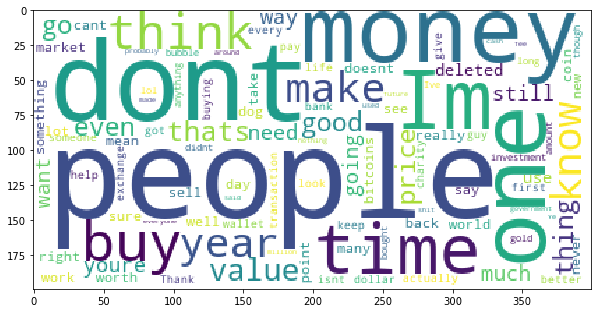

In [16]:
stp = STOPWORDS.copy()
stp.update([('bitcoin'),('BTC'),('crypto'),('currency')])
wc = WordCloud(background_color="white", max_words=100,  stopwords=stp, collocations=False)
# generate word cloud
wc.generate(word_str)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(random_state=3))
plt.show()

__Observation__: The word cloud shows that the majority of most frequently used words are neutral in nature. However, there seems to be words that have positive sentiment associated to them rather than negative, words such as 'good', 'well', 'value'. This is an important observation as it means that there is a high chance that the overall sentiment regarding bitCoin is positive.

### 2. Bigrams

In [17]:
from nltk.collocations import *

all_text = comments.iloc[:].Reply.str.cat(sep='. ')
all_text = nltk.word_tokenize(all_text)

def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)
print(common_bigrams(all_text,20,20))

[('InforTotesMessenger', 'ContactmessagecomposetorTotesMessenger'), ('bleep', 'bloop'), ('Withdraw', 'put_invoice_here'), ('Wall', 'Street'), ('Bill', 'Gates'), ('Balance', 'Deposit'), ('Mt', 'Gox'), ('FAQ', 'Information'), ('United', 'States'), ('put_invoice_here', 'Something'), ('Information', 'Source'), ('remove', 'v028'), ('Downvote', 'remove'), ('bloop', 'Someone'), ('Exclude', 'me'), ('me', 'Exclude'), ('net', 'neutrality'), ('Hi', 'uRed_Bagpipes'), ('Pineapple', 'Fund'), ('Donate', 'Downvote')]


__Observation__: The top 20 bigrams did not convey much regarding the sentiment values of Bitcoin. Rather, there are a lot of bigrams that are related to the topic itself which is expected, such as _('Wall', 'Street')_ or _('Pineapple', 'Fund')_ which is a philanthropic project by an anonymous individual which gave away 5,057 bitcoins to 60 charities.

# Sentiment Analysis

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
import numpy as np

## Prebuilt models

### 1. Vader

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants

# First, initialize VADER
vsid = SentimentIntensityAnalyzer()

In [20]:
import copy
# duplicate the 'comments' object 
vaderOut = copy.deepcopy(comments)

# The output of the vader model is a dictionary so we just need to call .Series() function
vaderOut[['Negative', 'Neutral', 'Positive', 'Compound']] = vaderOut.Reply.apply(lambda x: pd.Series(vsid.polarity_scores(x)))

In [21]:
# This function is used to classify whether the comment is positive, negative or neutral
# This will make comparative analysis easier later on
def classifying(row):
    if row['Compound'] > 0.2:
        return 'positive'
    elif row['Compound'] < -0.2:
        return 'negative'
    return 'neutral'

In [22]:
vaderOut['Classification'] = vaderOut.apply(lambda row: classifying(row), axis=1)

In [23]:
vaderOut.head()

,Reply,Upvote,Negative,Neutral,Positive,Compound,Classification
0,Brilliant Edit Well Im may well make comment u...,4543,0.000,0.653,0.347,0.9260,positive
1,Awesome except coin fell lmao,744,0.000,0.273,0.727,0.8402,positive
2,Best Simpsons ever,858,0.000,0.323,0.677,0.6369,positive
3,Simpsons predicted Bitcoin,369,0.000,1.000,0.000,0.0000,neutral
4,thing fall Homers head 1 Altcoin boom 2 Fake g...,971,0.279,0.721,0.000,-0.4767,negative


### 2. Textblob 

In [24]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber

# Initialize prebuilt model
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [25]:
# duplicate the 'comments' object 
textBlobOut = copy.deepcopy(comments)

# The output of this model is not a dictionary but an array? with elements
# So we have create a dictionary and return it to the Series() func
textBlobOut[['Negative', 'Positive', 'Classification']] = textBlobOut.Reply.apply(lambda x: pd.Series({'Negative':tba(x).sentiment[2],
                                                                                                      'Positive':tba(x).sentiment[1],
                                                                                                      'Classification':tba(x).sentiment[0]}))

In [26]:
textBlobOut.describe()

,Upvote,Negative,Positive
count,32703.000000,3.270300e+04,32703.000000
mean,15.912913,4.625646e-01,0.537435
std,146.423476,2.736296e-01,0.273630
min,-105.000000,1.709046e-30,0.000002
25%,1.000000,2.671118e-01,0.343535
50%,1.000000,4.686124e-01,0.531388
75%,4.000000,6.564649e-01,0.732888
max,11918.000000,9.999978e-01,1.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B830825C8>,
      dtype=object)

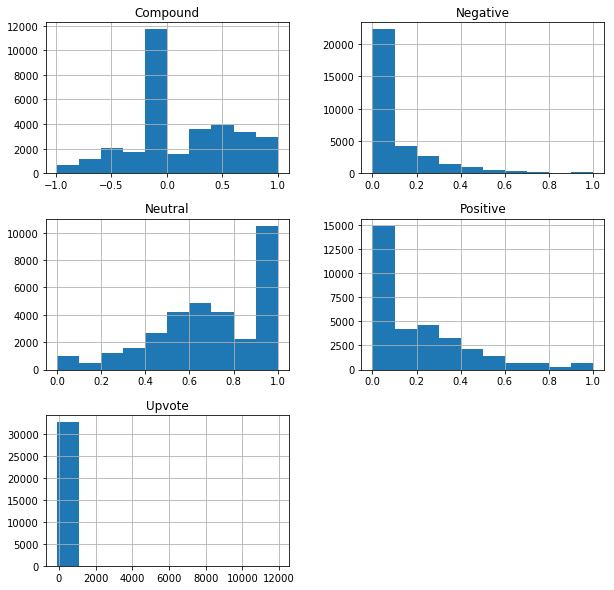

In [28]:
vaderOut.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B83082C08>,
      dtype=object)

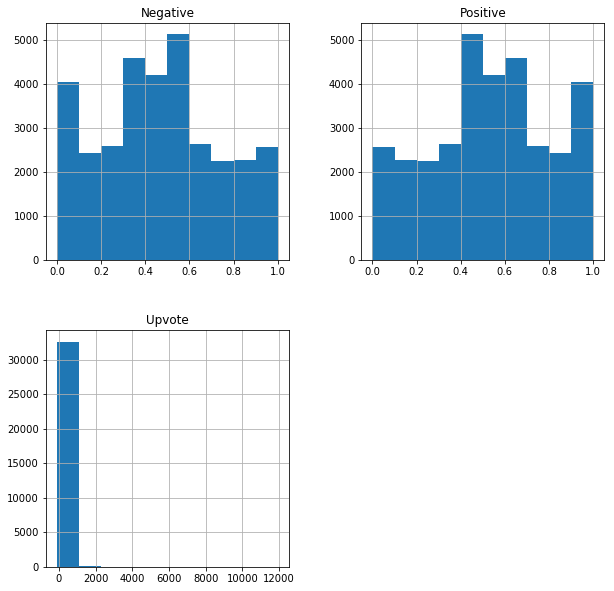

In [29]:
textBlobOut.hist(figsize =(10,10))

D:\Users\micha\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


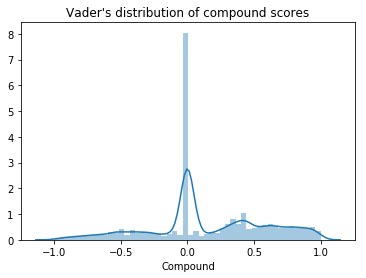

In [30]:
plt.title("Vader's distribution of compound scores")
sns.distplot(vaderOut['Compound'])

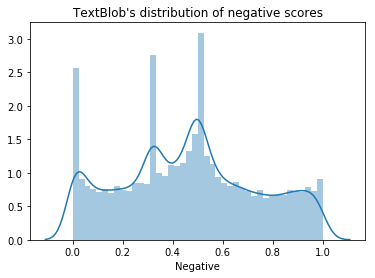

In [31]:
plt.title("TextBlob's distribution of negative scores")
sns.distplot(textBlobOut['Negative'])

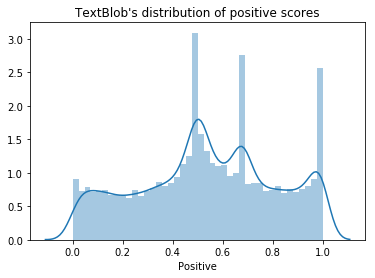

In [32]:
plt.title("TextBlob's distribution of positive scores")
sns.distplot(textBlobOut['Positive'])

__Observation:__ 
- One of the obvious observation is the differences between the measurement metrics between the 2 prebuilt models. The vader model score the sentimental values in 3 measurements, positive, negative and neutral while TextBlob only score base on positive and negative.
- The Vader model plot of the distributed compound scores represent a bell curve which shows that the there is a large number of neutral comments. This is expected with a quick glance at the data that a lot of the comments regarding BitCoin are information based which is nonsentimental. However, the right side of the graph is bigger than the left, which shows an overall positive sentiment regarding BitCoin. 
- The textBlob distribution of negative and positive scores shows that there is a higher number of comments with a positive sentiment as the positive score distribution is slightly skewed to the right.

__From these observations, we can conclude that there is a positive sentiment towards Bitcoin.__ 

## Training Model from Kaggle

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

### Load and preprocess training data

In [34]:
train = pd.read_csv('train.csv')

In [35]:
## 1. Droping null texts
train.dropna(subset=['text'], inplace=True)
## 2. Removing punctuations and symbols
train.text = train.text.apply(lambda x: re.sub(r'[^\w\s]', '', x) )
## 3. Removing stopwords
train.text = train.text.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))
## 4. Removing links
train.text = train.text.apply(lambda x: re.sub(r'\(?http\S+', '', x))
## 5. Lemmatization and Tokenizing
train.text = train.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [36]:
train_Y = train.sentiment
# Vectorizing the dataset into a matrix to fit the model
vectorizer = CountVectorizer()
train.dropna(subset=['text'], inplace=True)
train_X = vectorizer.fit_transform(train.text)
train_X

<27480x26934 sparse matrix of type '<class 'numpy.int64'>'
	with 193231 stored elements in Compressed Sparse Row format>

### Initlialize and train model

In [37]:
nb = MultinomialNB()
nb.fit(train_X, train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test the trained model 

In [38]:
# vectorizing the business dataset for testing 
comments.dropna(subset=['Reply'], inplace=True)
test_X = vectorizer.transform(comments.Reply)
test_X

<32703x26934 sparse matrix of type '<class 'numpy.int64'>'
	with 372856 stored elements in Compressed Sparse Row format>

In [39]:
# Get prediction 
predicted = nb.predict(test_X)
prediction_data = copy.deepcopy(comments)
prediction_data = prediction_data.assign(sentiment = predicted)

In [40]:
prediction_data.head()

,Reply,Upvote,sentiment
0,Brilliant Edit Well Im may well make comment u...,4543,neutral
1,Awesome except coin fell lmao,744,neutral
2,Best Simpsons ever,858,positive
3,Simpsons predicted Bitcoin,369,neutral
4,thing fall Homers head 1 Altcoin boom 2 Fake g...,971,negative


## Analyzing the results of pretrained model and the trained model

To compare between the pre-trained model and the trained model, I will compare the differences in the sentiment outputs from both models. 

__Note that I will only use the vader prebuilt model as the classification is more similar to that trained model.__

In [41]:
# Number of positives, Negative and Neutral sentiments of the pretrained model
pre_pos = vaderOut.Classification.value_counts().positive
pre_neg = vaderOut.Classification.value_counts().negative
pre_neu = vaderOut.Classification.value_counts().neutral

# Number of positives, Negative and Neutral sentiments of the trained model

pos = prediction_data.sentiment.value_counts().positive
neg = prediction_data.sentiment.value_counts().negative
neu = prediction_data.sentiment.value_counts().neutral

In [42]:
print("Pre-trained_positve = " + str(pre_pos))
print("Pre-trained_negative = " + str(pre_neg))
print("Pre-trained_neutral = " + str(pre_neu))
print("Trained_positve = " + str(pos))
print("Trained_negative = " + str(neg))
print("Trained_neutral = " + str(neu))

Pre-trained_positve = 13947
Pre-trained_negative = 5665
Pre-trained_neutral = 13091
Trained_positve = 5238
Trained_negative = 6377
Trained_neutral = 21088


### Vizualizing the differences 

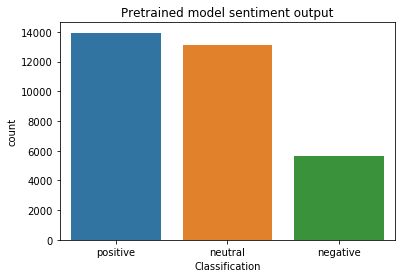

In [43]:
plt.title("Pretrained model sentiment output")
sns.countplot(vaderOut['Classification'])

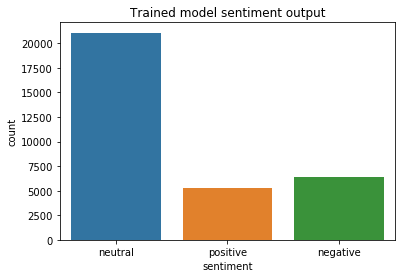

In [44]:
plt.title("Trained model sentiment output")
sns.countplot(prediction_data['sentiment'])

## Conclusion 

Looking at the sentiment classification of the pretrained model, there are a lot more positive comments than negative comments. Refering to past observations of the 2 prebuilt models, Bitcoin is believe to be positively perceived by the public. However, the model I have trained produced a significantly different result, showing a small number of positive sentiments with just over 5200 comments and pickups a higher number of negative sentiments.

__This proves that the prebuilt model from the Vader package is more robust and that Bitcoin is posively preceived by the public and can be a potentially good investments for Private Investors__